# Setup

## Imports

In [34]:
import QuantumToolbox as qt
using Logging
import CairoMakie as cm
using MiniLoggers
using Revise
using Dates

import JSON3

In [35]:
import SuperconductingCavities as SC

## Logger Setups

In [36]:
# MiniLogger(minlevel = MiniLoggers.Info) |> global_logger
InfoLogger = MiniLogger(minlevel = MiniLoggers.Info)
ProgressLogger = MiniLogger(minlevel = LogLevel(-1))
DebugLogger = MiniLogger(minlevel = MiniLoggers.Debug)

global_logger(ProgressLogger)

MiniLogger{MiniLoggers.Squash, VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}, VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}, DateFormat{Symbol("yyyy-mm-dd HH:MM:SS"), Tuple{Dates.DatePart{'y'}, Dates.Delim{Char, 1}, Dates.DatePart{'m'}, Dates.Delim{Char, 1}, Dates.DatePart{'d'}, Dates.Delim{Char, 1}, Dates.DatePart{'H'}, Dates.Delim{Char, 1}, Dates.DatePart{'M'}, Dates.Delim{Char, 1}, Dates.DatePart{'S'}}}, typeof(string)}(VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}(IOContext(Base.PipeEndpoint(RawFD(19) open, 0 bytes waiting)), VSCodeServer.io_send_callback), VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}(IOContext(Base.PipeEndpoint(RawFD(21) open, 0 bytes waiting)), VSCodeServer.io_send_callback), Error, LogLevel(-1), Dict{Any, Int64}(), true, MiniLoggers.Token[MiniLoggers.Token("[", MiniLoggers

# Looking at Mode 3

In [69]:
Mode3 = SC.Transmon_Resonators_Loader("ModelSaves/Mode3/Mode3.json");

## Calibrating Mode 3

### Qubit Pulses

### Sidebands at $\varepsilon = 0.78$

#### Getting Stark Shift

[2024-09-20 17:11:50] Info: Beginning Floquet Sweep
[2024-09-20 17:12:02] Info: Done With Floquet Sweep
[2024-09-20 17:12:02] Info: Tracking State (0, 1)
[2024-09-20 17:12:02] Info: Tracking State (2, 0)
[2024-09-20 17:12:03] Info: Fit Stuff: 3-element Vector{Float64}:	 0.042200385158003936	 0.0024962071844656613	 2.1431208451372914


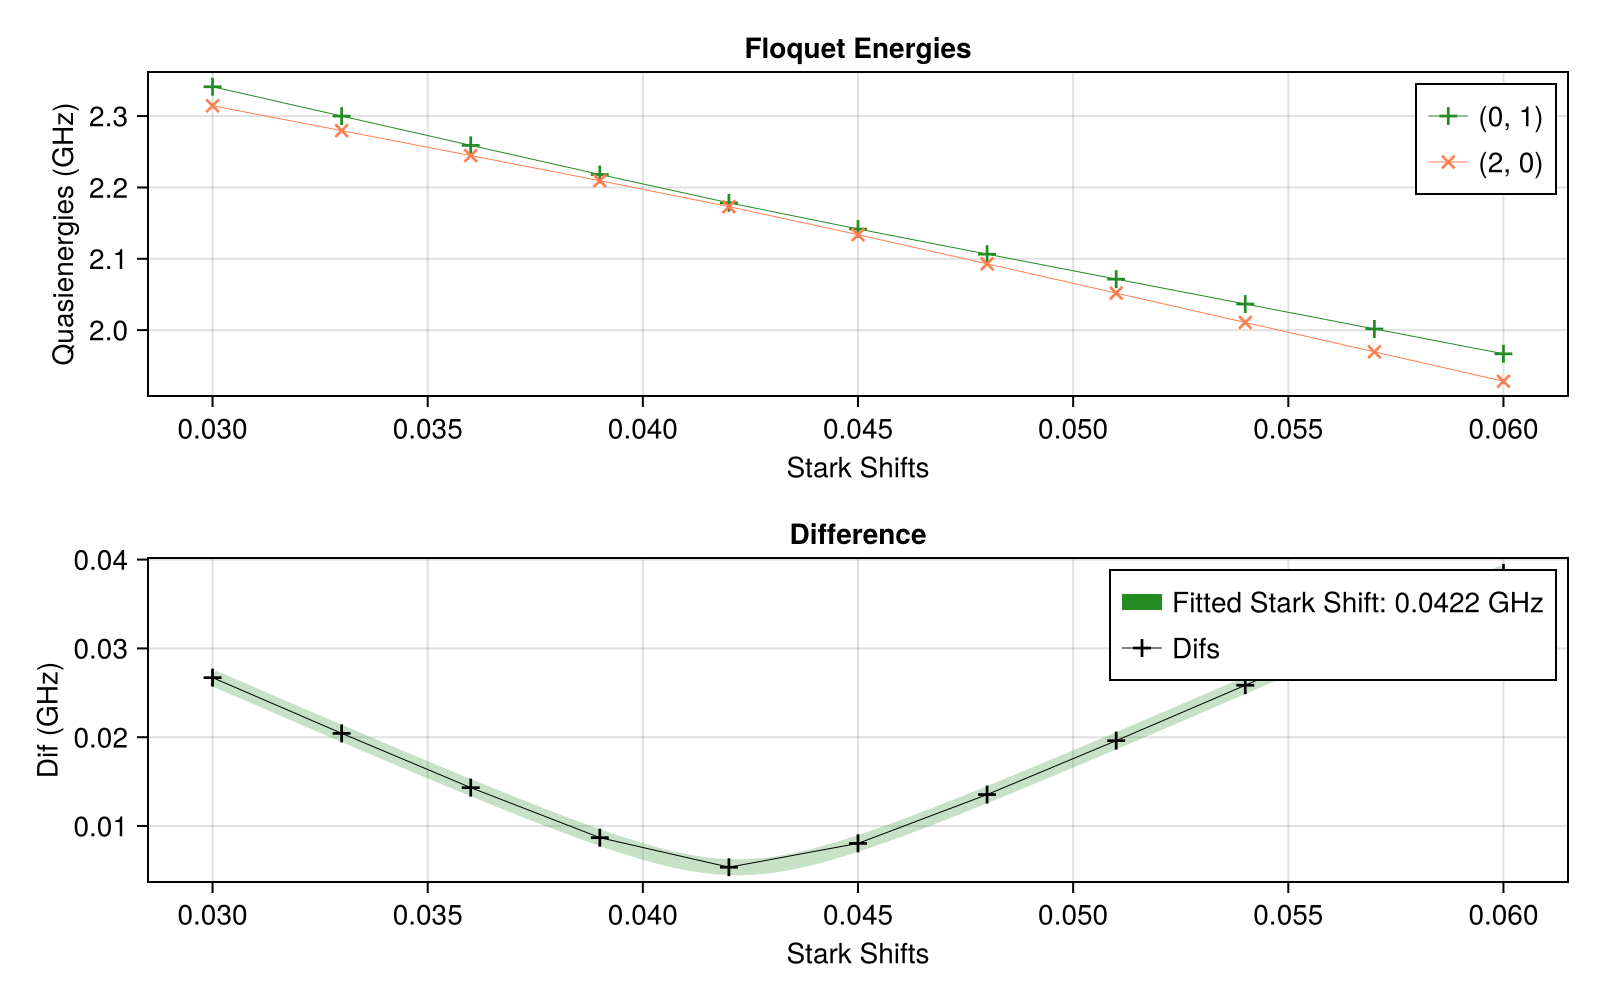

2-element Vector{Float64}:
   0.042200385158003936
 186.9272903868858

In [73]:
ε = 0.78
drive_op = Mode3.n̂ₜ
state1 = (2,0)
state2 = (0,1)

stark_shift_list = collect(LinRange(0.03, 0.06, 11))

stark_shift_res = SC.FindStarkShift(Mode3, drive_op, state1, state2, ε, stark_shift_list)

In [74]:
eps_78_stark_shift = 0.042200385158003936

0.042200385158003936

In [82]:
ramp_time_eps_78 = 5

5

#### f0->g1
Target Flattop time: 178.77ns

In [83]:
ψ1 = Mode3.dressed_states[(2,0)]
ψ2 = Mode3.dressed_states[(0,1)]

freq_d = Mode3.dressed_energies[(0,1)]-Mode3.dressed_energies[(2,0)]

envelope = "Sine_Squared_Ramp"
envelope_args = Dict{Any, Any}("ramp_time" => ramp_time_eps_78, "pulse_time" => 0)

t_range = [186.9272903868858, 186.9272903868858+ramp_time_eps_78*2]

optimize_res_f0g1_eps78 = SC.OptimizePulse(Mode3, ψ1, ψ2, ε, freq_d, eps_78_stark_shift, t_range, envelope, envelope_args)

[2024-09-20 17:35:36] Info: On Level 1
[2024-09-20 17:35:36] Info: On Step 1: t = 186.9272903868858
[2024-09-20 17:35:36] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-20 17:35:39] Info: Time Evolution Complete
[2024-09-20 17:35:39] Info: Done with Level_1_step_1
[2024-09-20 17:35:39] Info: On Step 2: t = 189.4272903868858
[2024-09-20 17:35:39] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-20 17:35:41] Info: Time Evolution Complete
[2024-09-20 17:35:41] Info: Done with Level_1_step_2
[2024-09-20 17:35:41] Info: On Step 3: t = 191.9272903868858
[2024-09-20 17:35:41] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-09-20 17:35:45] Info: Time Evolution Complete
[2024-09-20 17:35:45] Info: Done with Level_1_step_3
[2024-09-20 17:35:4

Dict{Any, Any} with 6 entries:
  "pulse_time"    => 192.084
  "Envelope Args" => Dict{Any, Any}("pulse_time"=>192.084, "ramp_time"=>5)
  "epsilon"       => 0.78
  "Envelope"      => "Sine_Squared_Ramp"
  "shift"         => 0.0422004
  "freq_d"        => -2.87015

#### f1->g2
Target Flattop time: 121.51ns

In [84]:
ψ1 = Mode3.dressed_states[(2,1)]
ψ2 = Mode3.dressed_states[(0,2)]

freq_d = Mode3.dressed_energies[(0,2)]-Mode3.dressed_energies[(2,1)]

envelope = "Sine_Squared_Ramp"
envelope_args = Dict{Any, Any}("ramp_time" => ramp_time_eps_78, "pulse_time" => 0)

t_range = [186.9272903868858/sqrt(2), 186.9272903868858/sqrt(2)+2*ramp_time_eps_78]

optimize_res_f1g2_eps78 = SC.OptimizePulse(Mode3, ψ1, ψ2, ε, freq_d, eps_78_stark_shift, t_range, envelope, envelope_args)

[2024-09-20 17:37:11] Info: On Level 1
[2024-09-20 17:37:11] Info: On Step 1: t = 132.17755462139388
[2024-09-20 17:37:11] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-09-20 17:37:15] Info: Time Evolution Complete
[2024-09-20 17:37:15] Info: Done with Level_1_step_1
[2024-09-20 17:37:15] Info: On Step 2: t = 134.67755462139388
[2024-09-20 17:37:15] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-09-20 17:37:18] Info: Time Evolution Complete
[2024-09-20 17:37:18] Info: Done with Level_1_step_2
[2024-09-20 17:37:18] Info: On Step 3: t = 137.17755462139388
[2024-09-20 17:37:18] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-09-20 17:37:21] Info: Time Evolution Complete
[2024-09-20 17:37:21] Info: Done with Level_1_step_3
[2024-09-20 17:3

Dict{Any, Any} with 6 entries:
  "pulse_time"    => 137.334
  "Envelope Args" => Dict{Any, Any}("pulse_time"=>137.334, "ramp_time"=>5)
  "epsilon"       => 0.78
  "Envelope"      => "Sine_Squared_Ramp"
  "shift"         => 0.0422004
  "freq_d"        => -2.86978

#### f2->g3
Target Flattop time: 96.95ns

In [85]:
ψ1 = Mode3.dressed_states[(2,2)]
ψ2 = Mode3.dressed_states[(0,3)]

freq_d = Mode3.dressed_energies[(0,3)]-Mode3.dressed_energies[(2,2)]

envelope = "Sine_Squared_Ramp"
envelope_args = Dict{Any, Any}("ramp_time" => ramp_time_eps_78, "pulse_time" => 0)

t_range = [186.9272903868858/sqrt(3), 186.9272903868858/sqrt(3)+2*ramp_time_eps_78]

optimize_res_f2g3_eps78 = SC.OptimizePulse(Mode3, ψ1, ψ2, ε, freq_d, eps_78_stark_shift, t_range, envelope, envelope_args)

[2024-09-20 17:38:29] Info: On Level 1
[2024-09-20 17:38:29] Info: On Step 1: t = 107.92252142375587
[2024-09-20 17:38:29] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-20 17:38:32] Info: Time Evolution Complete
[2024-09-20 17:38:32] Info: Done with Level_1_step_1
[2024-09-20 17:38:32] Info: On Step 2: t = 110.42252142375587
[2024-09-20 17:38:32] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-20 17:38:34] Info: Time Evolution Complete
[2024-09-20 17:38:34] Info: Done with Level_1_step_2
[2024-09-20 17:38:34] Info: On Step 3: t = 112.92252142375587
[2024-09-20 17:38:34] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-20 17:38:37] Info: Time Evolution Complete
[2024-09-20 17:38:37] Info: Done with Level_1_step_3
[2024-09-20 17:3

Dict{Any, Any} with 6 entries:
  "pulse_time"    => 113.079
  "Envelope Args" => Dict{Any, Any}("pulse_time"=>113.079, "ramp_time"=>5)
  "epsilon"       => 0.78
  "Envelope"      => "Sine_Squared_Ramp"
  "shift"         => 0.0422004
  "freq_d"        => -2.86942

#### f3->g4
Target Flattop time: 82.53ns

In [95]:
ψ1 = Mode3.dressed_states[(2,3)]
ψ2 = Mode3.dressed_states[(0,4)]

freq_d = Mode3.dressed_energies[(0,4)]-Mode3.dressed_energies[(2,3)]

envelope = "Sine_Squared_Ramp"
envelope_args = Dict{Any, Any}("ramp_time" => ramp_time_eps_78, "pulse_time" => 0)

ν = abs((eps_78_stark_shift+freq_d))
t_range = [(186.9272903868858/sqrt(4)), (186.9272903868858/sqrt(4)+20)]

optimize_res_f3g4_eps78 = SC.OptimizePulse(Mode3, ψ1, ψ2, ε, freq_d, eps_78_stark_shift, t_range, envelope, envelope_args)

[2024-09-20 17:52:04] Info: On Level 1
[2024-09-20 17:52:04] Info: On Step 1: t = 93.4636451934429
[2024-09-20 17:52:04] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-09-20 17:52:05] Info: Time Evolution Complete
[2024-09-20 17:52:05] Info: Done with Level_1_step_1
[2024-09-20 17:52:05] Info: On Step 2: t = 98.4636451934429
[2024-09-20 17:52:05] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-09-20 17:52:07] Info: Time Evolution Complete
[2024-09-20 17:52:07] Info: Done with Level_1_step_2
[2024-09-20 17:52:07] Info: On Step 3: t = 103.4636451934429
[2024-09-20 17:52:07] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-20 17:52:09] Info: Time Evolution Complete
[2024-09-20 17:52:09] Info: Done with Level_1_step_3
[2024-09-20 17:52:09]

Dict{Any, Any} with 6 entries:
  "pulse_time"    => 98.4636
  "Envelope Args" => Dict{Any, Any}("pulse_time"=>98.4636, "ramp_time"=>5)
  "epsilon"       => 0.78
  "Envelope"      => "Sine_Squared_Ramp"
  "shift"         => 0.0422004
  "freq_d"        => -2.86905

## Binomial Encoding

### Running Pulse Sequence

In [70]:
ψi = Mode3.dressed_states[(0,0)]
res = SC.RunPulseSequence(Mode3, ψi, Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"], Return = true, clean_up = true)

The Name for this run is: Operator_Sequence_2024-09-20T17:05:54.546
It is being saved at: Data/
[2024-09-20 17:05:54] Info: Running operator q_e_0
[2024-09-20 17:05:54] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-09-20 17:05:55] Info: Time Evolution Complete
[2024-09-20 17:05:55] Info: Saving Steps
[2024-09-20 17:05:56] Info: Done with Step_1
[2024-09-20 17:05:56] Info: Running operator q_g_0
[2024-09-20 17:05:56] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-09-20 17:05:57] Info: Time Evolution Complete
[2024-09-20 17:05:57] Info: Saving Steps
[2024-09-20 17:05:58] Info: Done with Step_2
[2024-09-20 17:05:58] Info: Running operator sb_f_0_Main
[2024-09-20 17:05:58] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-20 17:06:00] Inf

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Dict{Any, Any} with 2 entries:
  "times"  => Any[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8  …  4130.91,…
  "states" => Any[Quantum Object:   type=Ket   dims=[10, 10]   size=(100,)…

### Looking at Results

In [71]:
proj_dict = SC.Get_Projection_Ops(Mode3.dressed_states);
EVs = SC.Get_EVs(res["states"], proj_dict);

[2024-09-20 17:07:35] Info: Making Plot


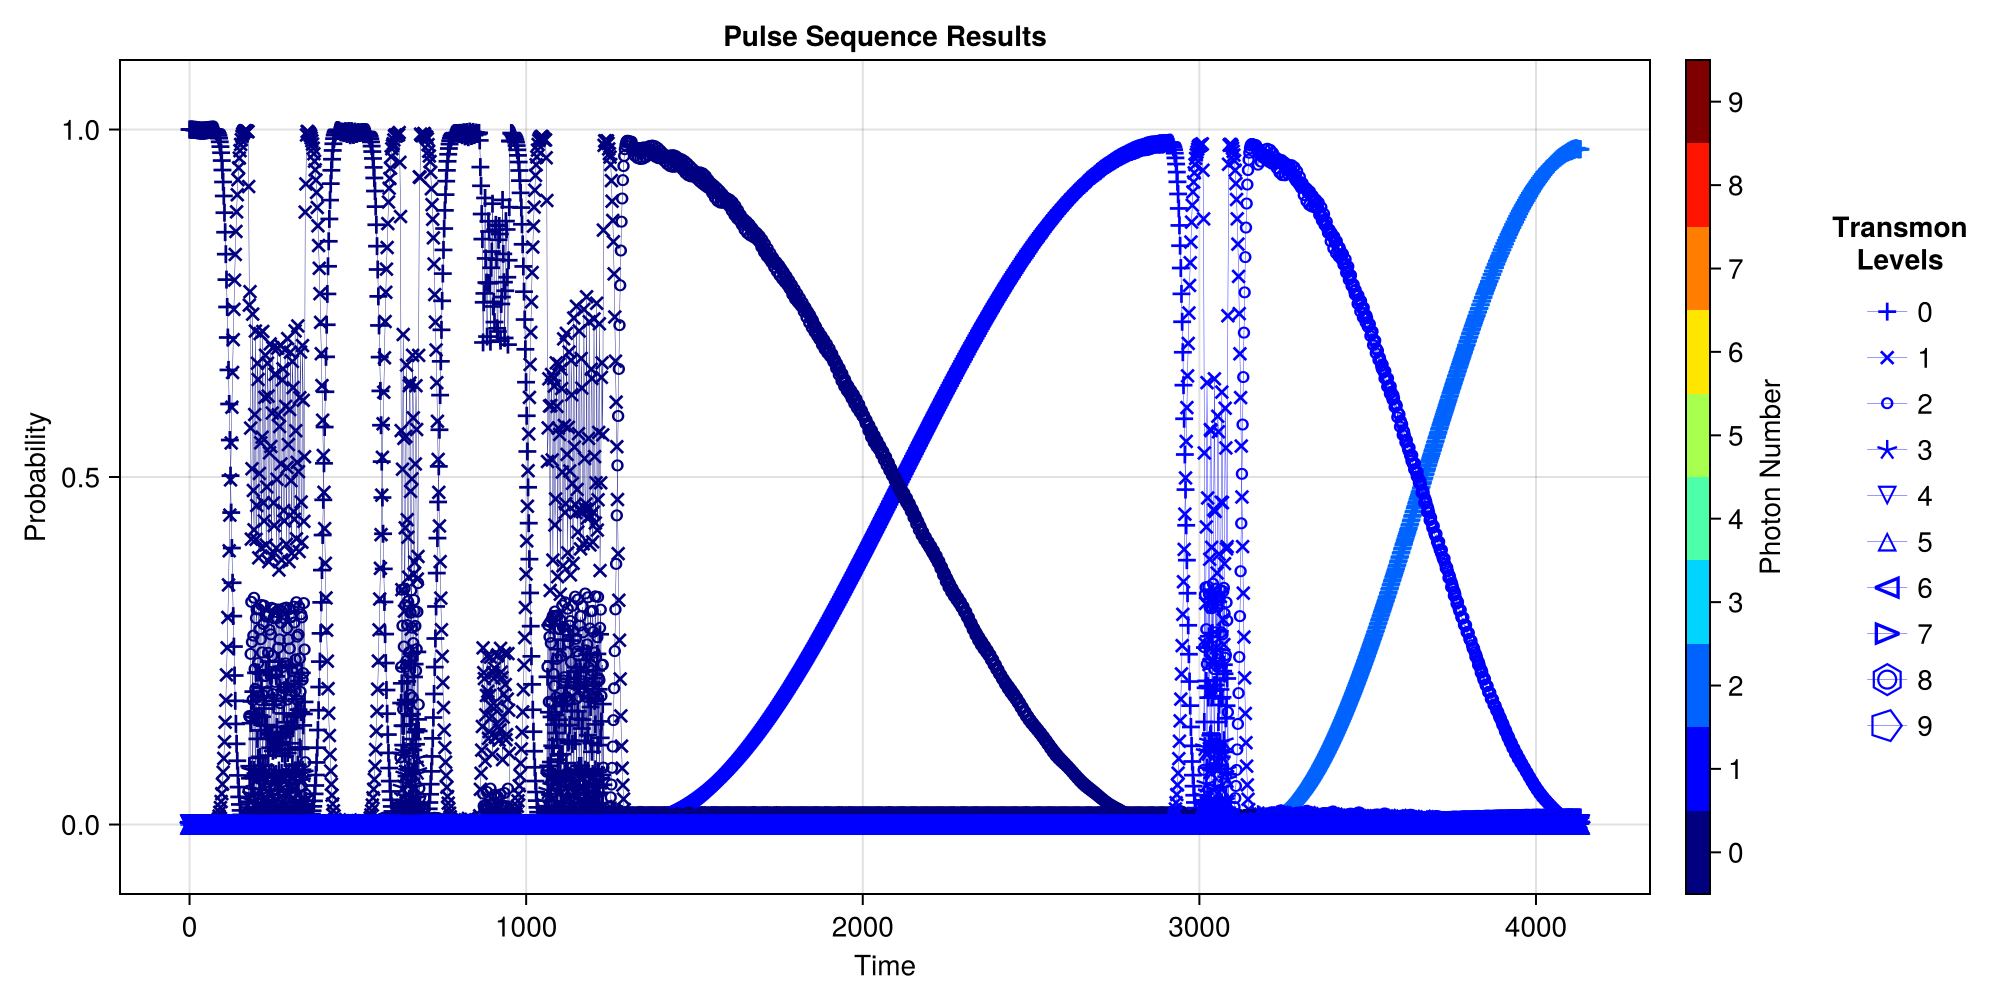

In [72]:
SC.PlotSingleModeEvolution(Mode3, res["times"], EVs, plot_every = 10)